<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Business Analytics e Machine Learning Para Projetos de Data Science</font>
## <font color='blue'>Projeto 6</font>
## <font color='blue'>Teste A/B em Campanha de Geoespacial Marketing Analytics</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# %reload_ext watermark
# %watermark -a "Data Science Academy"

## Carregando e Compreendendo o Formato de Dados Geoespaciais

In [6]:
# Semente para reprodutibilidade
np.random.seed(42)

In [7]:
# Carregando os dados
df_dsa = pd.read_csv('dataset.csv')

In [8]:
# Shape
df_dsa.shape

(1000, 5)

In [9]:
# Amostra
df_dsa.head()

,usuario_id,grupo,latitude,longitude,conversao
0,1,A,35.669109,6.869443,1
1,2,B,6.497346,-7.494524,1
2,3,A,-34.285029,-170.768856,0
3,4,A,56.483104,-57.150782,1
4,5,A,33.251611,-43.129577,0


## Como Conduzir Um Conduzir Um Teste A/B

Para conduzir um Teste A/B o primeiro passo é definir as hipóteses. As hipóteses são normalmente divididas em hipótese nula (H0) e hipótese alternativa (H1). Vamos definir as hipóteses para nosso problema:

**Hipótese Nula (H0)**:

A hipótese nula afirma que não há diferença significativa na taxa média de conversão entre os grupos A e B. Ou seja, H0: pA = pB.

- pA é a taxa média de conversão do grupo A
- pB é a taxa média de conversão do grupo B

**Hipótese Alternativa (H1)**:

A hipótese alternativa afirma que há uma diferença significativa na taxa média de conversão entre os grupos A e B. Ou seja, H1: pA != pB.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
**Passos Para o Teste de Hipóteses**:

1- Definir o Nível de Significância (α)

O nível de significância comum é 0.05, o que indica que estamos dispostos a aceitar um risco de 5% de rejeitar a hipótese nula quando ela é verdadeira.

2- Calcular a Estatística de Teste

Use um teste estatístico adequado (por exemplo, teste t de Student ou teste de proporção) para comparar as taxas de conversão entre os dois grupos.

3- Tomar uma Decisão

Compare o valor-p obtido com o nível de significância.

- Se valor-p <= α, rejeitamos a hipótese nula e aceitamos a hipótese alternativa.
- Se valor-p > α, não rejeitamos a hipótese nula. Ou seja, falhamos em rejeitar a H0.

## Explorando os Dados e Calculando a Taxa Média de Conversão

In [16]:
#proporcao de cada grupo
df_dsa['grupo'].value_counts(normalize=True)

grupo
B    0.51
A    0.49
Name: proportion, dtype: float64

In [10]:
# Calculando a taxa de conversão por grupo
taxa_conversao = df_dsa.groupby('grupo')['conversao'].mean()

In [11]:
# Exibindo taxas de conversão
print("Taxa de Conversão por Grupo:")
print(taxa_conversao)

Taxa de Conversão por Grupo:
grupo
A    0.300000
B    0.315686
Name: conversao, dtype: float64


In [12]:
# Separação dos grupos
grupo_A = df_dsa[df_dsa['grupo'] == 'A']
grupo_B = df_dsa[df_dsa['grupo'] == 'B']

In [13]:
# Cálculo das taxas médias de conversão
taxa_conversao_A = grupo_A['conversao'].mean()
taxa_conversao_B = grupo_B['conversao'].mean()

In [14]:
taxa_conversao_A

np.float64(0.3)

In [15]:
taxa_conversao_B

np.float64(0.3156862745098039)

## Escolha do Teste Estatístico Apropriado

Veja a descrição completa no videobook do Capítulo 14 do curso.

O teste t de Student é um teste estatístico paramétrico usado para determinar se há uma diferença significativa entre as médias de dois grupos. É amplamente utilizado quando os dados são aproximadamente normalmente distribuídos e as variâncias dos grupos são homogêneas.

Hipóteses do Teste

- Hipótese Nula (H0): Não há diferença significativa entre as médias dos grupos.
- Hipótese Alternativa (H1): Há uma diferença significativa entre as médias dos grupos.

O teste t de Student é uma ferramenta estatística poderosa, mas possui certas suposições que precisam ser atendidas para que os resultados sejam válidos. Aqui estão as principais suposições:

- Normalidade
- Independência das Amostras
- Homogeneidade das Variâncias (ou Homocedasticidade)

## Validando as Suposições do Teste Paramétrico

Veja a descrição completa no ebook do Capítulo 14 do curso.

### Teste de Normalidade

In [14]:
# Teste de Shapiro-Wilk para normalidade
shapiro_A = stats.shapiro(grupo_A['conversao'])
shapiro_B = stats.shapiro(grupo_B['conversao'])
print(f'Teste de Shapiro-Wilk Grupo A: {shapiro_A}')
print(f'Teste de Shapiro-Wilk Grupo B: {shapiro_B}')

Teste de Shapiro-Wilk Grupo A: ShapiroResult(statistic=np.float64(0.5755484295691086), pvalue=np.float64(8.305357450336786e-33))
Teste de Shapiro-Wilk Grupo B: ShapiroResult(statistic=np.float64(0.5851295031033471), pvalue=np.float64(4.3919138194577314e-33))


A interpretação dos resultados do teste de Shapiro-Wilk para normalidade é baseada no valor-p (p-value) obtido:

- Hipótese Nula (H0): Os dados são normalmente distribuídos.
- Hipótese Alternativa (H1): Os dados não são normalmente distribuídos.

**Interpretação dos Resultados**

Para ambos os grupos, A e B, tivemos resultados muito baixos para a estatística do teste e valores-p extremamente pequenos (próximos de zero).

Tomada de Decisão:

- Se o valor p for menor que α, rejeitamos a hipótese nula.
- Se o valor p for maior ou igual a α, não rejeitamos a hipótese nula.

Resultados Obtidos:

- Para o Grupo A: p-value = 8.305264317902864e-33
- Para o Grupo B: p-value = 4.392181009917721e-33

Ambos os valores p são muito menores que 0.05.

**Conclusão**

- Para o Grupo A, o valor p é significativamente menor que 0.05. Isso significa que rejeitamos a hipótese nula de que os dados são normalmente distribuídos. Portanto, os dados do Grupo A não são normalmente distribuídos.
- Para o Grupo B, o valor p também é significativamente menor que 0.05. Isso significa que rejeitamos a hipótese nula de que os dados são normalmente distribuídos. Portanto, os dados do Grupo B não são normalmente distribuídos.

**Ações a Tomar**

Como os dados de ambos os grupos não são normalmente distribuídos, a suposição de normalidade para o teste t de Student não é atendida. Neste caso, você pode considerar os seguintes passos:

Transformação dos Dados:

- Tente transformar os dados para aproximá-los de uma distribuição normal (por exemplo, transformações logarítmicas).

Testes Não Paramétricos:

- Use um teste não paramétrico que não assume normalidade, como o teste de Mann-Whitney U (também conhecido como teste de Wilcoxon rank-sum).

### Teste de Homogeneidade das Variâncias

In [15]:
# Verificação da homogeneidade das variâncias
levene_test = stats.levene(grupo_A['conversao'], grupo_B['conversao'])
print(f'Teste de Levene para homogeneidade das variâncias:\n{levene_test}')

Teste de Levene para homogeneidade das variâncias:
LeveneResult(statistic=np.float64(0.2880082452976037), pvalue=np.float64(0.5916193377766582))


A interpretação do resultado do teste de Levene para homogeneidade das variâncias envolve os seguintes passos:

Hipóteses do Teste de Levene

- Hipótese Nula (H0): As variâncias dos dois grupos são iguais (homogeneidade das variâncias).
- Hipótese Alternativa (H1): As variâncias dos dois grupos são diferentes (heterogeneidade das variâncias).

**Interpretação dos Resultados**

Resultados Obtidos:

- Statistic: 0.2880082452976037
- p-value: 0.5916193377766582

Tomada de Decisão:

- Se o valor p for menor que α, rejeitamos a hipótese nula.
- Se o valor p for maior ou igual a α, não rejeitamos a hipótese nula.

**Conclusão**

O valor-p do teste de Levene é 0.5916193377766582, que é significativamente maior que 0.05. Portanto, não rejeitamos a hipótese nula.

As variâncias dos dois grupos (A e B) são consideradas iguais. A suposição de homogeneidade das variâncias é atendida para o teste t de Student, o que significa que podemos assumir que as variâncias dos grupos A e B são aproximadamente iguais.

**Ações a Tomar**

Dado que a suposição de homogeneidade das variâncias é atendida, você poderia proceder com o teste t de Student padrão para comparar as médias dos dois grupos. No entanto, como os dados não são normalmente distribuídos (conforme determinado pelos resultados do teste de Shapiro-Wilk), seria mais apropriado usar um teste não paramétrico como o teste de Mann-Whitney U para comparar as conversões entre os grupos A e B.

Resumo

- Teste de Shapiro-Wilk: Os dados dos grupos A e B não são normalmente distribuídos.
- Teste de Levene: As variâncias dos grupos A e B são homogêneas.

Recomendação: Utilizar o teste de Mann-Whitney U para comparar as taxas de conversão entre os grupos A e B, pois ele não assume normalidade dos dados.

### Você Validou as Suposições do Teste, Certo? Certo?

In [17]:
# Teste t de Student para comparar as médias de conversão
t_stat, p_val = stats.ttest_ind(grupo_A['conversao'], grupo_B['conversao'])

In [18]:
print(f'Taxa de conversão do Grupo A: {grupo_A["conversao"].mean()}')
print(f'Taxa de conversão do Grupo B: {grupo_B["conversao"].mean()}')
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_val}')

Taxa de conversão do Grupo A: 0.3
Taxa de conversão do Grupo B: 0.3156862745098039
Estatística t: -0.5366639966474401
Valor p: 0.5916193377768858


In [19]:
# Interpretação dos resultados
if p_val < 0.05:
    print("Rejeitamos a H0. Diferença estatisticamente significativa entre os grupos A e B")
else:
    print("Falhamos em rejeitar a H0. Não há diferença estatisticamente significativa entre os grupos A e B")

Falhamos em rejeitar a H0. Não há diferença estatisticamente significativa entre os grupos A e B


## Quando Aplicar Teste Não Paramétrico?

Veja a descrição completa no videobook do Capítulo 14 do curso.

Testes não paramétricos são usados quando as suposições necessárias para os testes paramétricos não são atendidas. Eles não assumem uma distribuição específica dos dados, tornando-os úteis em diversas situações. 

## Aplicando Teste Não Paramétrico

O teste de Mann-Whitney U, também conhecido como teste de Wilcoxon rank-sum, é um teste não paramétrico utilizado para comparar duas amostras independentes. Ele é utilizado quando as suposições de normalidade necessárias para o teste t de Student não são atendidas.

O teste de Mann-Whitney U verifica se há uma diferença significativa entre as distribuições de duas amostras independentes. Ele é frequentemente utilizado como uma alternativa ao teste t de Student quando os dados não são normalmente distribuídos.

Hipóteses do Teste

- Hipótese Nula (H0): As distribuições das duas populações são iguais, ou seja, as duas amostras provêm da mesma distribuição.

- Hipótese Alternativa (H1): As distribuições das duas populações são diferentes, ou seja, as duas amostras provêm de distribuições diferentes.

Suposições

- As amostras são independentes.
- As observações são ordinalmente mensuráveis.
- O teste não assume normalidade das amostras.

In [20]:
# Teste de Mann-Whitney U
u_stat, p_val_mw = stats.mannwhitneyu(grupo_A['conversao'], grupo_B['conversao'])

In [21]:
print(f'Estatística U: {u_stat}')
print(f'Valor p (Mann-Whitney): {p_val_mw}')

Estatística U: 122990.0
Valor p (Mann-Whitney): 0.5914621529131736


In [22]:
# Interpretação dos resultados
alpha = 0.05
if p_val_mw < alpha:
    print("Rejeitamos a hipótese nula. Diferença estatisticamente significativa entre os grupos A e B")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre os grupos A e B")

Não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre os grupos A e B


## Distribuição Geográfica dos Grupos A e B

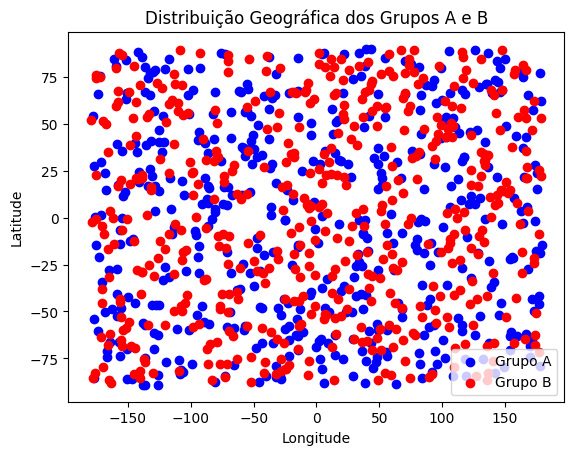

In [23]:
# Plot
plt.scatter(grupo_A['longitude'], grupo_A['latitude'], c='blue', label='Grupo A')
plt.scatter(grupo_B['longitude'], grupo_B['latitude'], c='red', label='Grupo B')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Distribuição Geográfica dos Grupos A e B')
plt.show()

## Conclusão

Com base na análise dos dados, não temos evidências estatísticas para afirmar que a campanha de Marketing apresenta diferença entre as regiões geográficas dos usuários. 

A região geográfica não tem influência na taxa média de conversão nos dados analisados.

In [23]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [24]:
#%watermark -v -m

In [25]:
#%watermark --iversions

# Fim